# Time Series Forecasting Explore. 

En este proyecto se busca estimar el ritmo de ventas de una empresa, con el fin de tener disponible el espacio de almacenamiento del producto para los próximos meses.

## Paso 1. Carga del conjunto de datos.  


In [61]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")
df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [62]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [63]:
df.shape


(366, 2)

In [64]:
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
361    False
362    False
363    False
364    False
365    False
Length: 366, dtype: bool

Al analizar el formato de la columna date, se buscará obtener solo la fecha sin la hora, ya que, no es necesaria la hora para este análisis:

In [65]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [66]:
df['date'] = df['date'].dt.date

In [67]:
df.set_index('date', inplace=True)

In [68]:
df.head()

,sales
date,
2022-09-03,55.292157
2022-09-04,53.803211
2022-09-05,58.141693
2022-09-06,64.530899
2022-09-07,66.013633


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2022-09-03 to 2023-09-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   366 non-null    float64
dtypes: float64(1)
memory usage: 5.7+ KB


## Paso 2. Construye y analiza la serie temporal.  


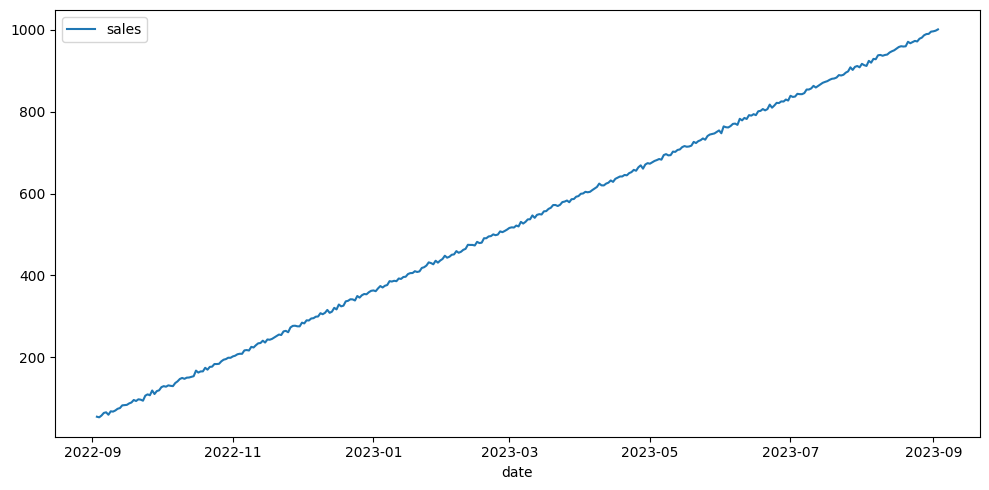

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df)

plt.tight_layout()

plt.show()

In [71]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df, period = 12)
decomposition

### Análisis de tendencia. 

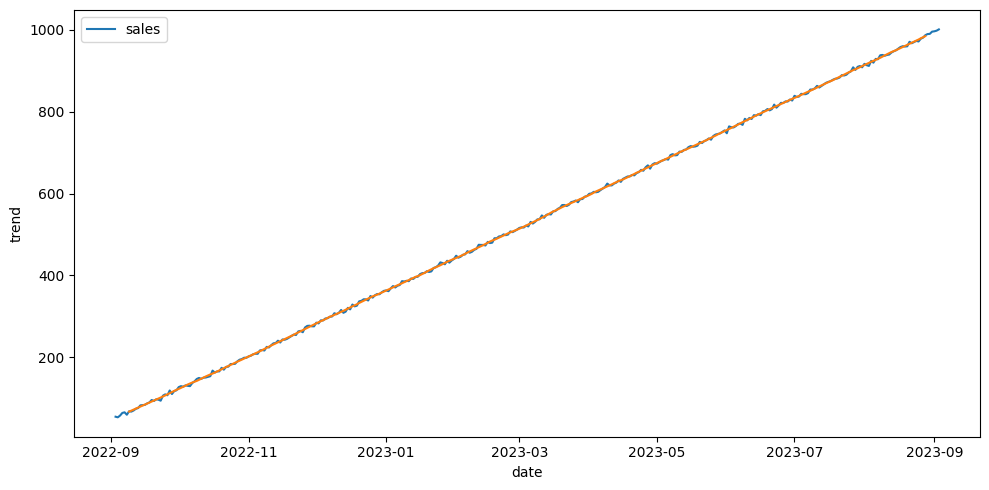

In [73]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()